**Importing Required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\mythi\Downloads\data\data\demo_data\1.ushape.csv",header=None)

In [3]:
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [5]:
df[2].value_counts()

0.0    50
1.0    50
Name: 2, dtype: int64

<AxesSubplot:xlabel='0', ylabel='1'>

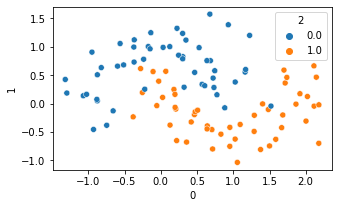

In [6]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = df[0], y = df[1], hue = df[2])

**Splitting train and test data**

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[[0,1]], df[2], train_size = 0.9)

In [8]:
#Shape of 'x_train' and 'y_train'

print(x_train.shape,y_train.shape)

#Shape of 'x_test' and 'y_test'

print(x_test.shape,y_test.shape)

(90, 2) (90,)
(10, 2) (10,)


**Standardizing the train data**

In [9]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [10]:
std_train=std.fit_transform(x_train)

In [11]:
std_train

array([[ 0.80093862,  1.71354574],
       [ 0.13220176,  0.94965141],
       [ 1.09395162, -0.53103508],
       [-2.08788811,  0.37892777],
       [-0.2258841 ,  0.14393554],
       [-0.8423248 ,  0.0835014 ],
       [ 0.49149821, -1.07292335],
       [ 1.84609193,  0.44757128],
       [-0.18707066, -1.51855673],
       [ 0.22059061, -1.72777366],
       [ 0.18670337,  0.94694469],
       [ 0.41152507, -0.48036938],
       [ 0.87164059, -1.19568706],
       [ 1.70663924, -0.13758036],
       [ 0.57516065,  0.30091991],
       [-1.43847962, -1.00953143],
       [-0.31154081,  1.11361557],
       [ 1.80871284,  0.79055387],
       [-0.65323863, -0.41418502],
       [-0.62380089,  0.32684132],
       [ 0.28895462, -0.08503306],
       [ 1.35781541,  0.27141355],
       [-0.06419724, -0.68603197],
       [ 1.58948715, -0.05279617],
       [-0.38483664,  0.07588117],
       [ 1.00432574, -0.36203577],
       [-0.0599492 ,  0.59237832],
       [-0.55473894,  1.350199  ],
       [ 1.88508462,

**Creating Dense layers**

In [12]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model=Sequential()
model.add(Dense(3,activation="relu",input_dim=2))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 dense_4 (Dense)             (None, 2)                 8         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


**Compile**

In [22]:
model.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['accuracy'])

**Fitting**

In [23]:
save=model.fit(x_train,y_train,batch_size=10,epochs=100,verbose=1,validation_split=0.1)

Epoch 1/100
9/9 [==============================] - 1s 31ms/step - loss: 0.6777 - accuracy: 0.5802 - val_loss: 0.6405 - val_accuracy: 0.8889
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6735 - accuracy: 0.5926 - val_loss: 0.6380 - val_accuracy: 0.8889
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6706 - accuracy: 0.6173 - val_loss: 0.6356 - val_accuracy: 0.8889
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6670 - accuracy: 0.6420 - val_loss: 0.6332 - val_accuracy: 0.8889
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6639 - accuracy: 0.6420 - val_loss: 0.6313 - val_accuracy: 0.8889
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6607 - accuracy: 0.6543 - val_loss: 0.6300 - val_accuracy: 0.7778
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6564 - accuracy: 0.6914 - val_loss: 0.6280 - val_accuracy: 0.8889
Epoch 8/100
9/9 [=========

In [24]:
tl=save.history["loss"]
cvl=save.history["val_loss"]

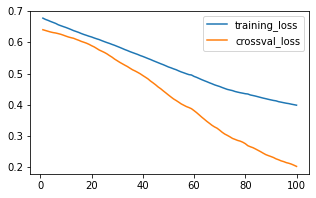

In [28]:
plt.figure(figsize = (5,3))
plt.plot(range(1,101),tl,label="training_loss")
plt.plot(range(1,101),cvl,label="crossval_loss")
plt.legend()

In [29]:
predi=model.predict(x_train)

3/3 [==============================] - 0s 6ms/step


In [37]:
predict=np.where(predi>0.5,1,0).flatten()

<AxesSubplot:xlabel='0', ylabel='1'>

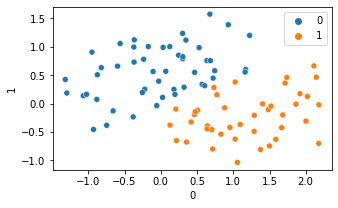

In [38]:
plt.figure(figsize = (5,3))
sns.scatterplot(x=x_train[0],y=x_train[1],hue=predict)

<AxesSubplot:xlabel='0', ylabel='1'>

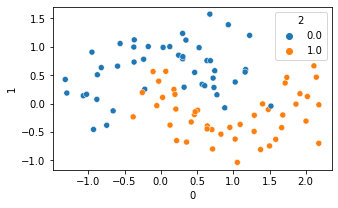

In [40]:
plt.figure(figsize = (5,3))
sns.scatterplot(x=x_train[0],y=x_train[1],hue=y_train)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,predict)

0.8444444444444444

In [34]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 5s 1ms/step


<AxesSubplot:>

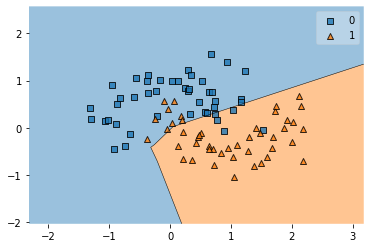

In [35]:
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)

2430/2430 [==============================] - 3s 1ms/step


<AxesSubplot:>

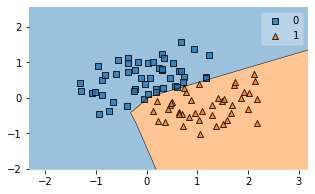

In [41]:
plt.figure(figsize = (5,3))
plot_decision_regions(x_train[[0,1]].values,predict.astype(int),clf=model)